In [ ]:
'''
EX 1 A

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [8]:
#1. Read the data
df=pd.read_csv('lung_cancer_detection.csv')

In [9]:
#2. Display the first and last 5 rows
print("First 5 rows:")
print(df.head())
print("\nLast 5 rows:")
print(df.tail())

First 5 rows:
  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   65        1               1        1              2   
1      F   55        1               2        2              1   
2      F   78        2               2        1              1   
3      M   60        2               1        1              1   
4      F   80        1               1        2              1   

   CHRONIC_DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL_CONSUMING  COUGHING  \
0                2        1        2         2                  2         2   
1                1        2        2         2                  1         1   
2                1        2        1         2                  1         1   
3                2        1        2         1                  1         2   
4                1        2        1         2                  1         1   

   SHORTNESS_OF_BREATH  SWALLOWING_DIFFICULTY  CHEST_PAIN LUNG_CANCER  
0                    2                    

In [10]:
# 3. Display the number of rows and columns
print("\nNumber of rows:", df.shape[0])
print("Number of columns:", df.shape[1])


Number of rows: 3000
Number of columns: 16


In [11]:
# 4. Display the number of categorical and numerical columns
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(exclude='object').columns
print("\nNumber of categorical columns:", len(categorical_cols))
print("Number of numerical columns:", len(numerical_cols))


Number of categorical columns: 2
Number of numerical columns: 14


In [12]:
# 5. For numerical columns, display the min, max and mode
for col in numerical_cols:
    print(f"\nColumn: {col}")
    print("Min:", df[col].min())
    print("Max:", df[col].max())
    print("Mode:", df[col].mode()[0])


Column: AGE
Min: 30
Max: 80
Mode: 54

Column: SMOKING
Min: 1
Max: 2
Mode: 1

Column: YELLOW_FINGERS
Min: 1
Max: 2
Mode: 2

Column: ANXIETY
Min: 1
Max: 2
Mode: 1

Column: PEER_PRESSURE
Min: 1
Max: 2
Mode: 1

Column: CHRONIC_DISEASE
Min: 1
Max: 2
Mode: 2

Column: FATIGUE
Min: 1
Max: 2
Mode: 1

Column: ALLERGY
Min: 1
Max: 2
Mode: 2

Column: WHEEZING
Min: 1
Max: 2
Mode: 1

Column: ALCOHOL_CONSUMING
Min: 1
Max: 2
Mode: 1

Column: COUGHING
Min: 1
Max: 2
Mode: 2

Column: SHORTNESS_OF_BREATH
Min: 1
Max: 2
Mode: 1

Column: SWALLOWING_DIFFICULTY
Min: 1
Max: 2
Mode: 1

Column: CHEST_PAIN
Min: 1
Max: 2
Mode: 1


In [13]:
# 6. Display the columns with null values
null_cols = df.columns[df.isnull().any()].tolist()
print("\nColumns with null values:", null_cols)


Columns with null values: []



5 Number Summary:
               AGE      SMOKING  YELLOW_FINGERS      ANXIETY  PEER_PRESSURE  \
count  3000.000000  3000.000000     3000.000000  3000.000000    3000.000000   
mean     55.169000     1.491000        1.514000     1.494000       1.499000   
std      14.723746     0.500002        0.499887     0.500047       0.500082   
min      30.000000     1.000000        1.000000     1.000000       1.000000   
25%      42.000000     1.000000        1.000000     1.000000       1.000000   
50%      55.000000     1.000000        2.000000     1.000000       1.000000   
75%      68.000000     2.000000        2.000000     2.000000       2.000000   
max      80.000000     2.000000        2.000000     2.000000       2.000000   

       CHRONIC_DISEASE      FATIGUE      ALLERGY     WHEEZING  \
count      3000.000000  3000.000000  3000.000000  3000.000000   
mean          1.509667     1.489667     1.506667     1.497333   
std           0.499990     0.499977     0.500039     0.500076   
min      

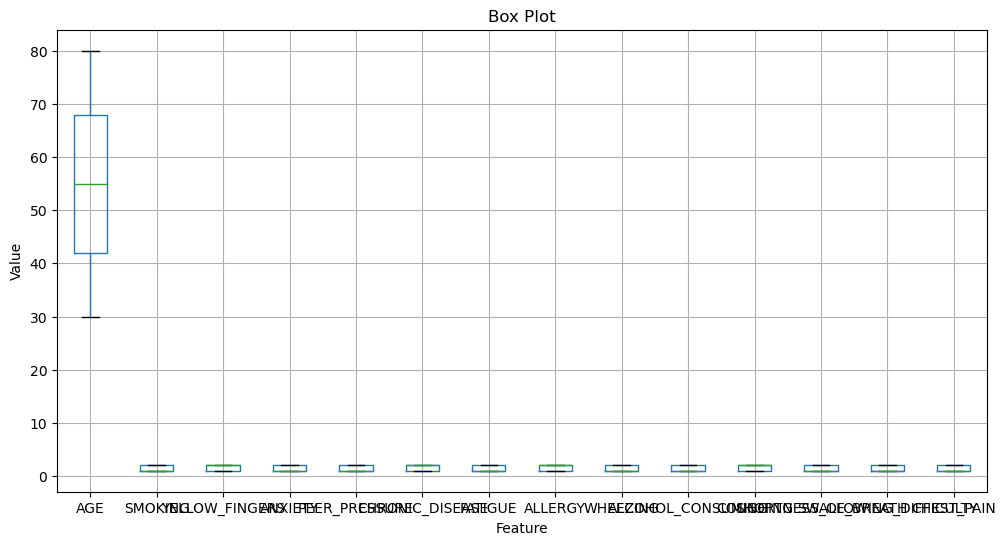

In [14]:
# 7. Calculate the 5 number summary and correlate with box plot
print("\n5 Number Summary:")
print(df[numerical_cols].describe())

fig, ax = plt.subplots(figsize=(12, 6))
df[numerical_cols].boxplot(ax=ax)
plt.title("Box Plot")
plt.xlabel("Feature")
plt.ylabel("Value")
plt.show()

In [15]:
# 8. Display the outlier values using Z-score
for col in numerical_cols:
    z = np.abs(stats.zscore(df[col]))
    outliers = df[col][z > 3].unique()
    print(f"\nOutliers for {col}: {outliers}")


Outliers for AGE: []

Outliers for SMOKING: []

Outliers for YELLOW_FINGERS: []

Outliers for ANXIETY: []

Outliers for PEER_PRESSURE: []

Outliers for CHRONIC_DISEASE: []

Outliers for FATIGUE: []

Outliers for ALLERGY: []

Outliers for WHEEZING: []

Outliers for ALCOHOL_CONSUMING: []

Outliers for COUGHING: []

Outliers for SHORTNESS_OF_BREATH: []

Outliers for SWALLOWING_DIFFICULTY: []

Outliers for CHEST_PAIN: []


In [16]:
# 9. Display the features with high positive correlation, high negative correlation and no correlation
corr_matrix = df[numerical_cols].corr()
high_positive = corr_matrix[corr_matrix > 0.7].stack().reset_index(name='correlation')
high_negative = corr_matrix[corr_matrix < -0.7].stack().reset_index(name='correlation')
no_correlation = corr_matrix[abs(corr_matrix) < 0.1].stack().reset_index(name='correlation')

print("\nFeatures with high positive correlation:")
print(high_positive)

print("\nFeatures with high negative correlation:")
print(high_negative)

print("\nFeatures with no correlation:")
print(no_correlation)


Features with high positive correlation:
                  level_0                level_1  correlation
0                     AGE                    AGE          1.0
1                 SMOKING                SMOKING          1.0
2          YELLOW_FINGERS         YELLOW_FINGERS          1.0
3                 ANXIETY                ANXIETY          1.0
4           PEER_PRESSURE          PEER_PRESSURE          1.0
5         CHRONIC_DISEASE        CHRONIC_DISEASE          1.0
6                 FATIGUE                FATIGUE          1.0
7                 ALLERGY                ALLERGY          1.0
8                WHEEZING               WHEEZING          1.0
9       ALCOHOL_CONSUMING      ALCOHOL_CONSUMING          1.0
10               COUGHING               COUGHING          1.0
11    SHORTNESS_OF_BREATH    SHORTNESS_OF_BREATH          1.0
12  SWALLOWING_DIFFICULTY  SWALLOWING_DIFFICULTY          1.0
13             CHEST_PAIN             CHEST_PAIN          1.0

Features with high negative

C:\Users\urk22ai1048\AppData\Local\Temp\ipykernel_9328\1564419233.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\tools\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


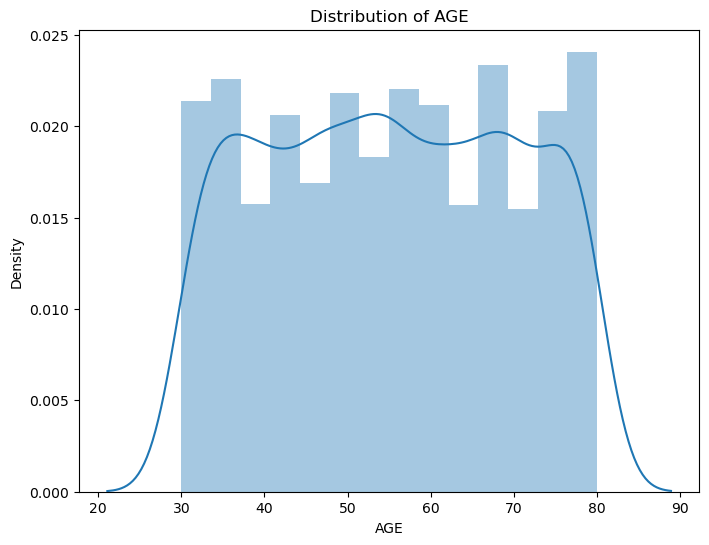

C:\Users\urk22ai1048\AppData\Local\Temp\ipykernel_9328\1564419233.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\tools\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


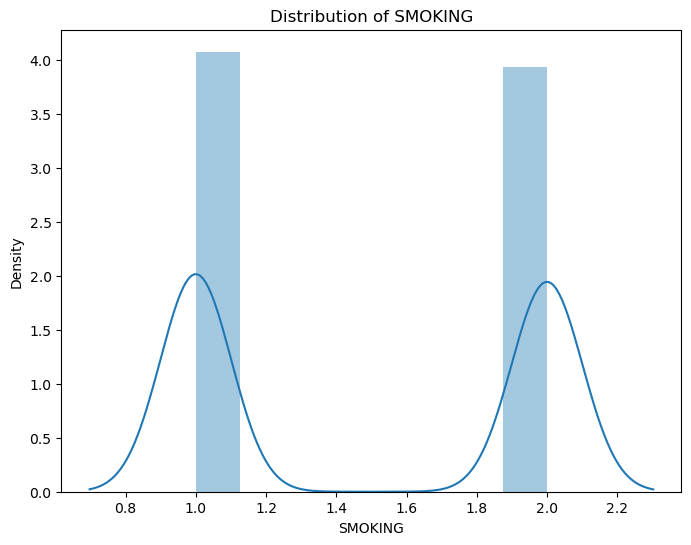

C:\Users\urk22ai1048\AppData\Local\Temp\ipykernel_9328\1564419233.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\tools\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


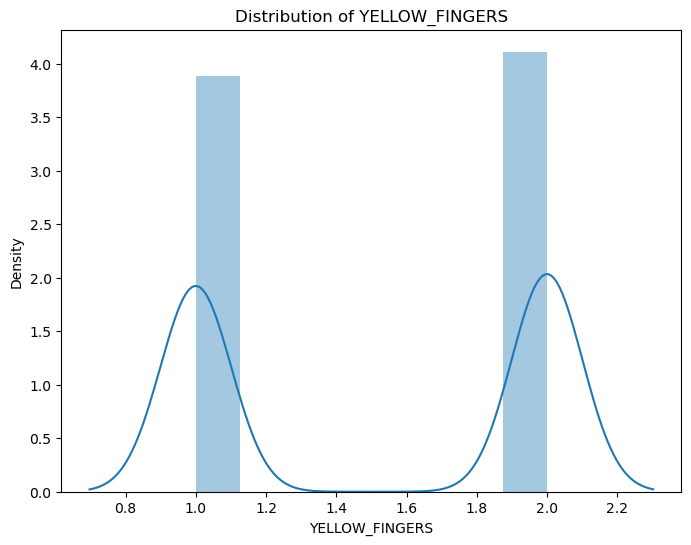

C:\Users\urk22ai1048\AppData\Local\Temp\ipykernel_9328\1564419233.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\tools\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


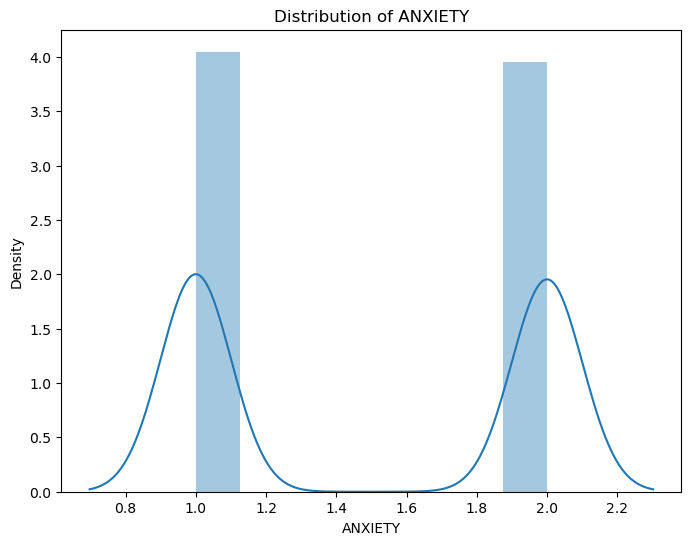

C:\Users\urk22ai1048\AppData\Local\Temp\ipykernel_9328\1564419233.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\tools\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


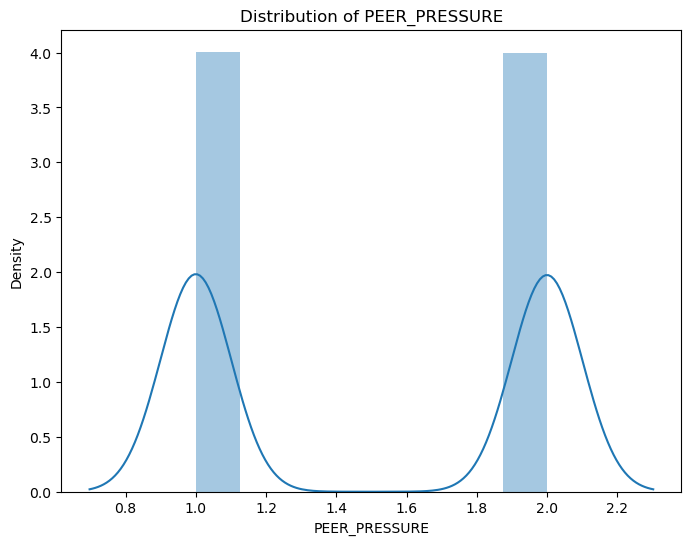

C:\Users\urk22ai1048\AppData\Local\Temp\ipykernel_9328\1564419233.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\tools\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


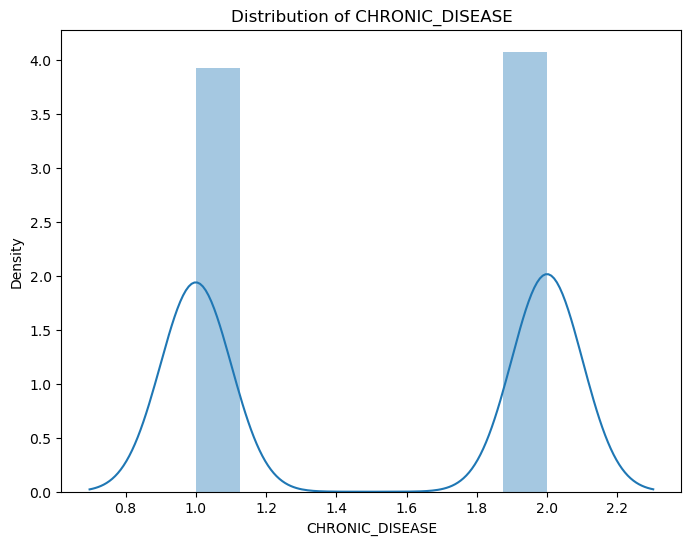

C:\Users\urk22ai1048\AppData\Local\Temp\ipykernel_9328\1564419233.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\tools\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


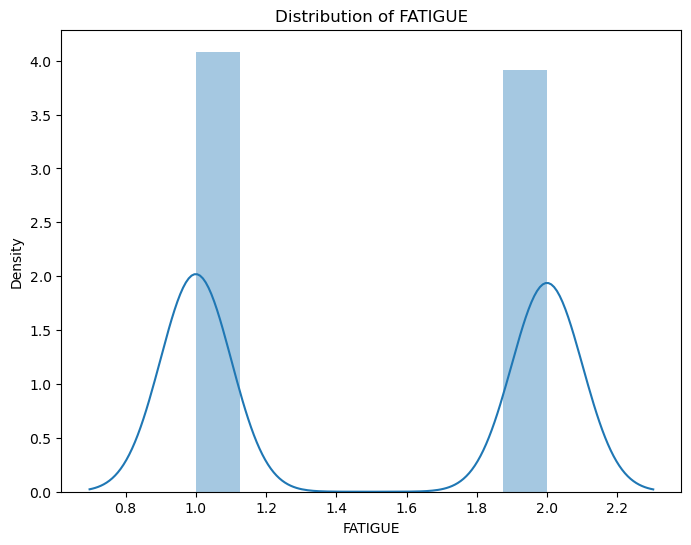

C:\Users\urk22ai1048\AppData\Local\Temp\ipykernel_9328\1564419233.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\tools\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


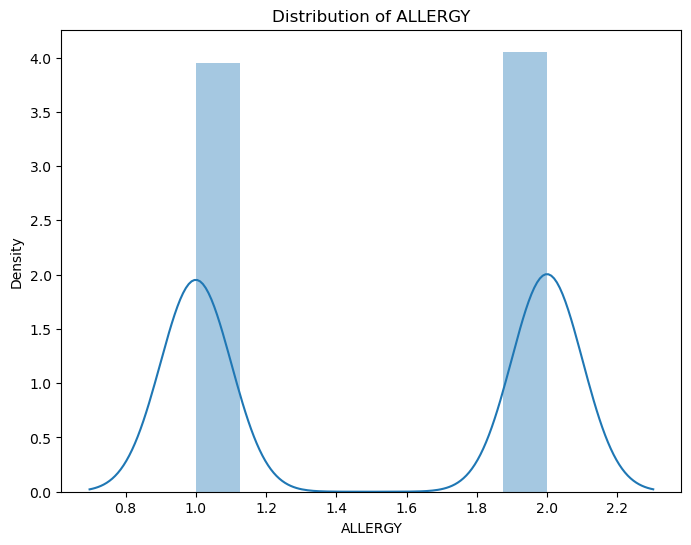

C:\Users\urk22ai1048\AppData\Local\Temp\ipykernel_9328\1564419233.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\tools\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


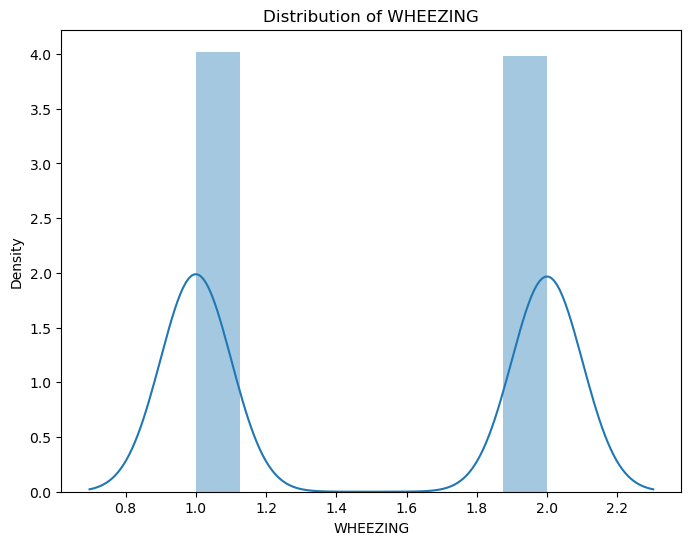

C:\Users\urk22ai1048\AppData\Local\Temp\ipykernel_9328\1564419233.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\tools\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


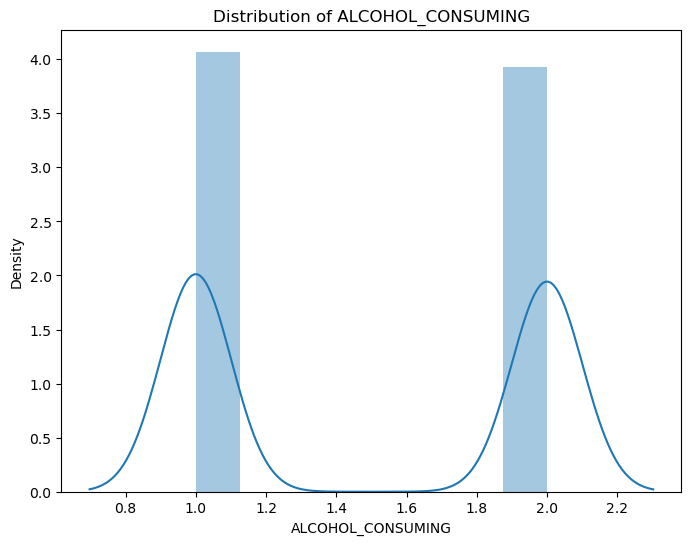

C:\Users\urk22ai1048\AppData\Local\Temp\ipykernel_9328\1564419233.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\tools\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


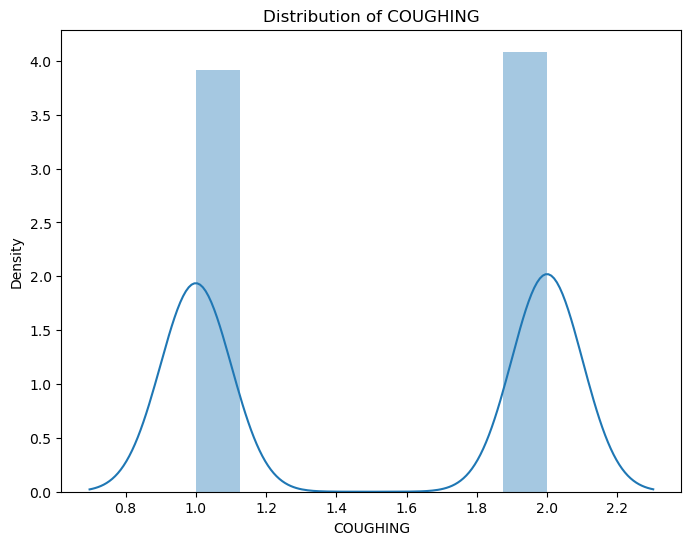

C:\Users\urk22ai1048\AppData\Local\Temp\ipykernel_9328\1564419233.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\tools\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


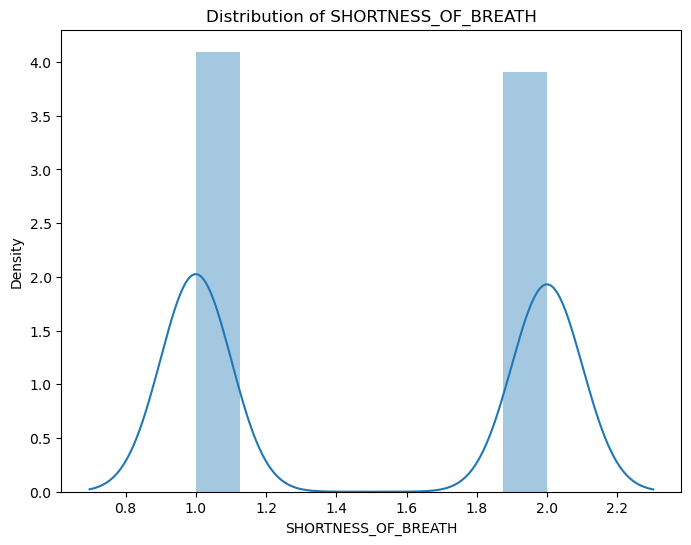

C:\Users\urk22ai1048\AppData\Local\Temp\ipykernel_9328\1564419233.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\tools\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


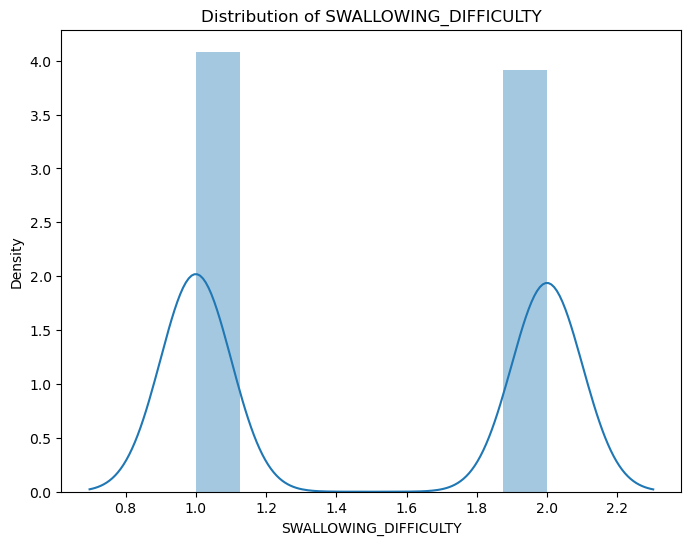

C:\Users\urk22ai1048\AppData\Local\Temp\ipykernel_9328\1564419233.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\tools\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


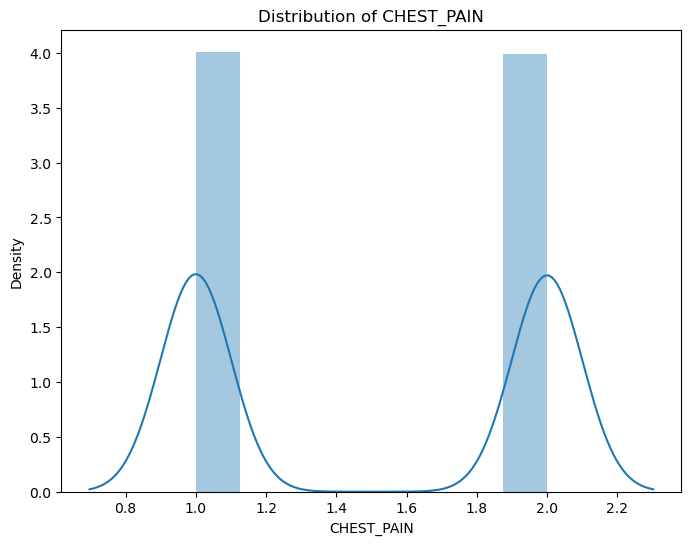

In [17]:
# 10. Analyze the skewness of the features using plot distribution graph
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.distplot(df[col])
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

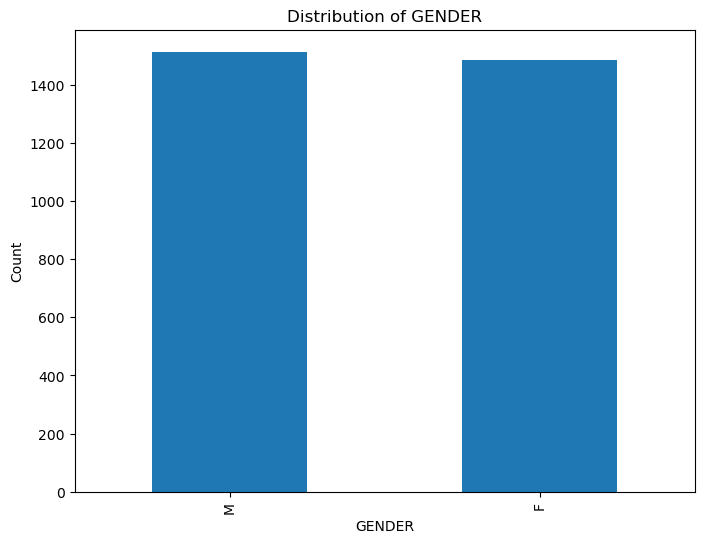

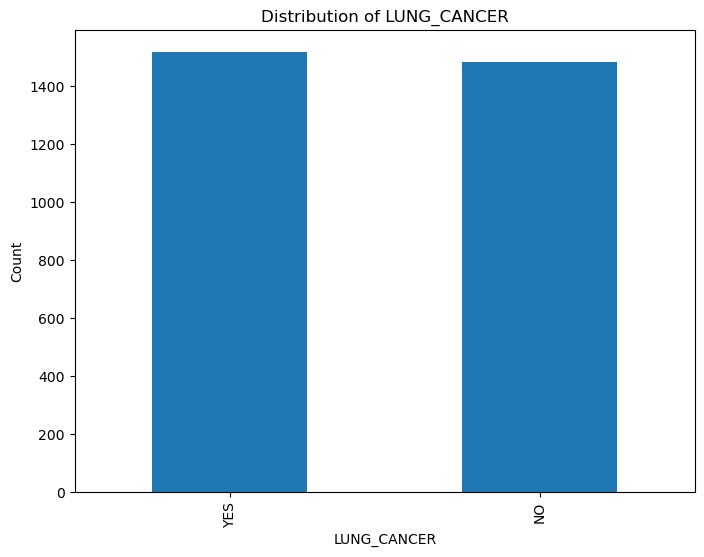

In [18]:
# 11. Perform univariate analysis for categorical variables using bar plot
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


C:\tools\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\tools\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


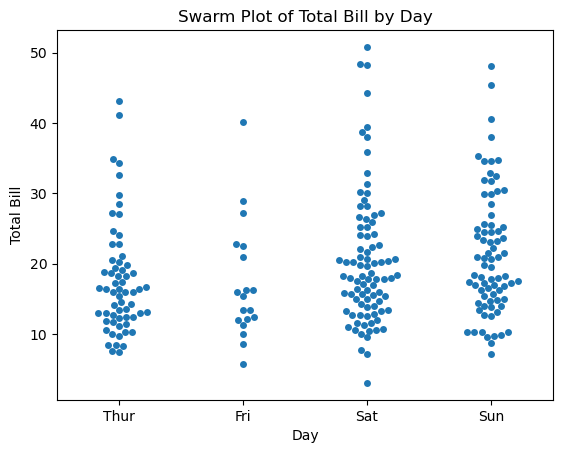

In [19]:
# 12. Perform univariate analysis for continuous variables using swarm plot and violin plot
# Load example dataset
tips = sns.load_dataset("tips")

# Create swarm plot
sns.swarmplot(x="day", y="total_bill", data=tips)
plt.title("Swarm Plot of Total Bill by Day")
plt.xlabel("Day")
plt.ylabel("Total Bill")
plt.show()

C:\tools\Anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


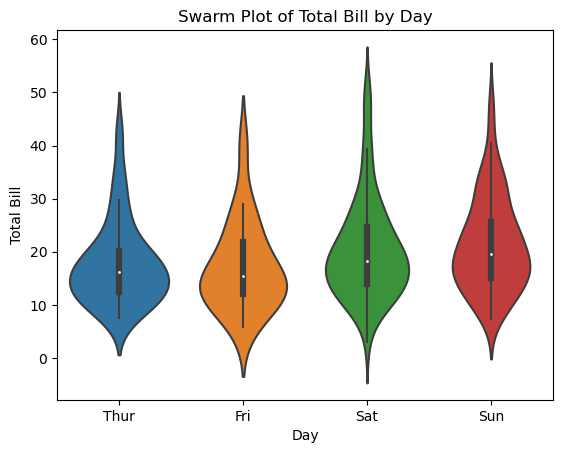

In [20]:
# 12. Perform univariate analysis for continuous variables using swarm plot and violin plot
# Load example dataset
tips = sns.load_dataset("tips")

# Create swarm plot
sns.violinplot(x="day", y="total_bill", data=tips)
plt.title("Swarm Plot of Total Bill by Day")
plt.xlabel("Day")
plt.ylabel("Total Bill")
plt.show()

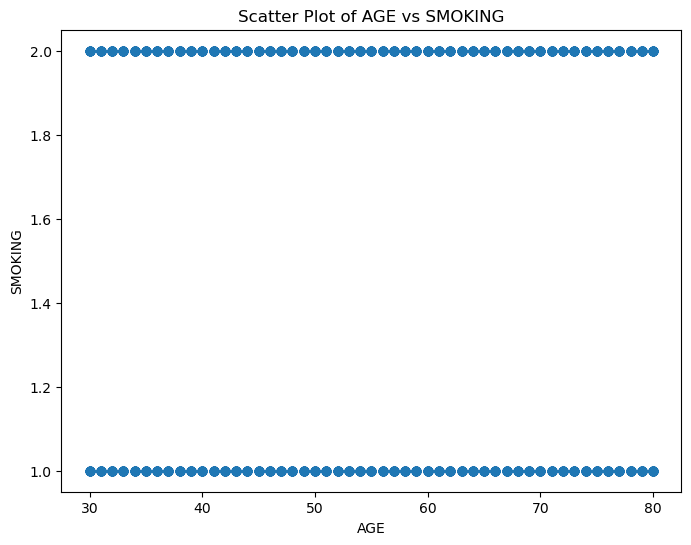

In [21]:
# 13. Display the scatter plot to show the relationship between two continuous variables
plt.figure(figsize=(8, 6))
plt.scatter(df[numerical_cols[0]], df[numerical_cols[1]])
plt.xlabel(numerical_cols[0])
plt.ylabel(numerical_cols[1])
plt.title(f"Scatter Plot of {numerical_cols[0]} vs {numerical_cols[1]}")
plt.show()

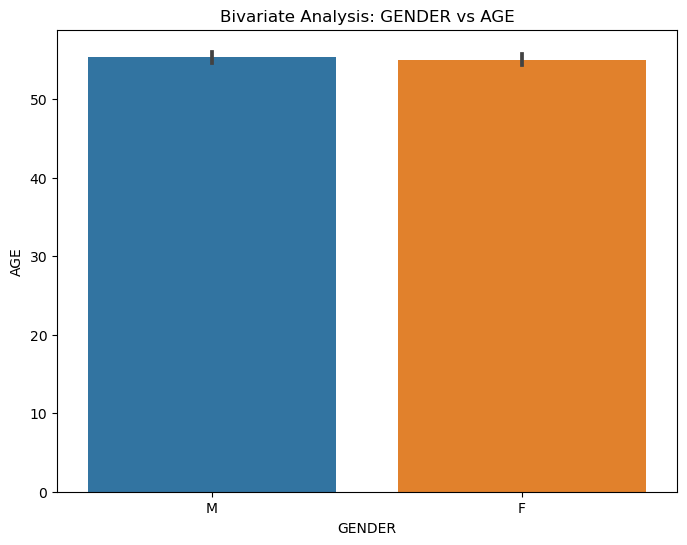

In [22]:
# 14. Perform a bivariate analysis between continuous variable and categorical variable using categorical plot
plt.figure(figsize=(8, 6))
sns.barplot(x=categorical_cols[0], y=numerical_cols[0], data=df)
plt.title(f"Bivariate Analysis: {categorical_cols[0]} vs {numerical_cols[0]}")
plt.xlabel(categorical_cols[0])
plt.ylabel(numerical_cols[0])
plt.show()

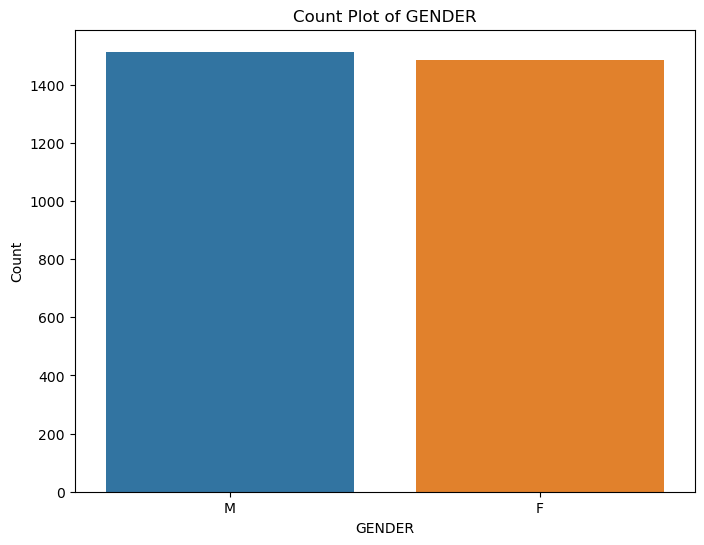

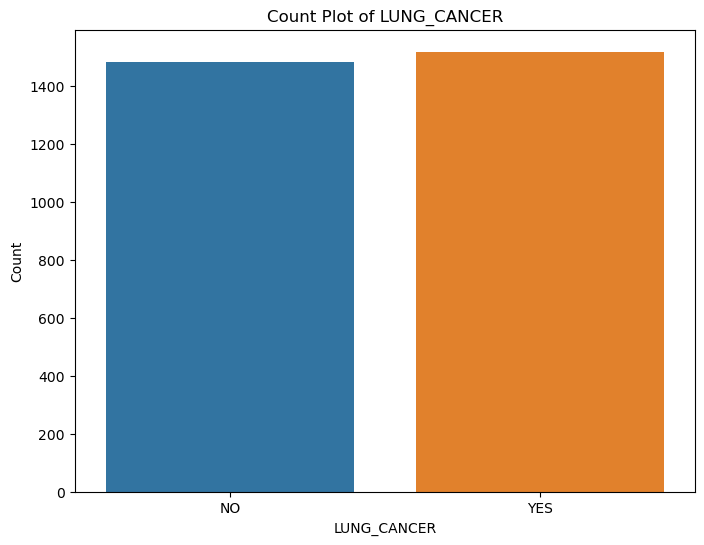

In [23]:
# 15. Display the counts of observations for categorical variable using count plot
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[col])
    plt.title(f"Count Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

In [ ]:
# 16. Perform a multivariate analysis between features using pair plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
df=pd.read_csv('lung_cancer_detection.csv')

plt.figure(figsize=(12, 12))
sns.pairplot(df)
plt.suptitle("Pair Plot of the Dataset", fontsize=16)
plt.show()

In [ ]:
pip install --upgrade notebook ipykernel jupyterlab